# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
s_data = pd.read_csv("D:/Files/Internships/The Sparks Foundation/study_hours.csv")

In [4]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


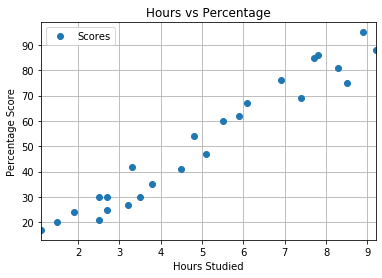

In [7]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

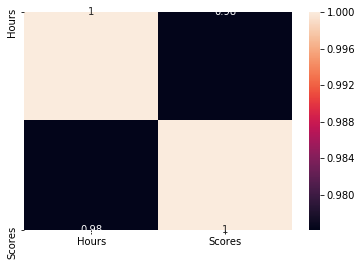

In [8]:
#Check the corelation
sns.heatmap(s_data.corr(), annot = True)

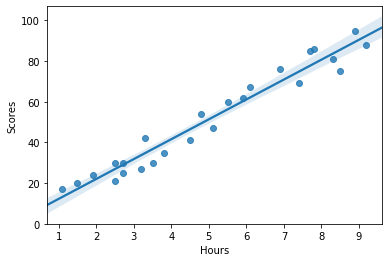

In [9]:
sns.regplot(x=s_data['Hours'],y=s_data['Scores'])

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).# 

In [10]:
x = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.3, random_state=0) 

In [13]:
#check the size
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


# # **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [14]:
import time

from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
s = time.time()
model.fit(x_train, y_train) 

print("Training complete.")
print((time.time() - s)*1000 , "ms")

Training complete.
159.165620803833 ms


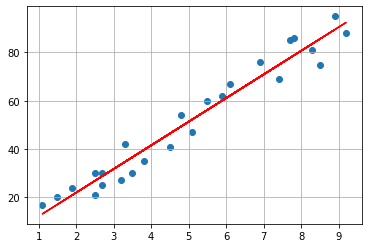

In [15]:
# Plotting the regression line
y_pred = model.coef_*x +model.intercept_  #(y = mx + c)

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, y_pred , color = "r")
plt.grid()
plt.show()

# # **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [17]:
# Comparing Actual vs Predicted
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# Testing phase ( Hours = 9.25 )
What will be the predicted score if a student study for 9.25 hrs in a day?

In [18]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

# this is a good score

Mean Absolute Error: 4.419727808027652
